In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pickle
import re

# Data Importing and cleaning

In [4]:
df_1=pd.read_csv('/content/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df_2=pd.read_csv('/content/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')
df_3=pd.read_csv('/content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df_4=pd.read_csv('/content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df_5=pd.read_csv('/content/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [5]:
df=pd.concat([df_1,df_2,df_3,df_4,df_5],axis=0)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [ ]:
df.to_csv('Resale flat prices based on Approval & Registration date from 1990 onwards.csv',index = False)

In [4]:
df=pd.read_csv('/content/Resale flat prices based on Approval & Registration date from 1990 onwards.csv')

<ipython-input-4-19cbc8d68608>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Resale flat prices based on Approval & Registration date from 1990 onwards.csv')


In [7]:
df.shape

(945530, 11)

In [8]:
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945530 entries, 0 to 199326
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                945530 non-null  object 
 1   town                 945530 non-null  object 
 2   flat_type            945530 non-null  object 
 3   block                945530 non-null  object 
 4   street_name          945530 non-null  object 
 5   storey_range         945530 non-null  object 
 6   floor_area_sqm       945530 non-null  float64
 7   flat_model           945530 non-null  object 
 8   lease_commence_date  945530 non-null  int64  
 9   resale_price         945530 non-null  float64
 10  remaining_lease      236480 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 86.6+ MB


In [10]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [11]:
df.drop(columns=["remaining_lease"],inplace=True)

In [12]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


In [13]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [14]:
df.loc[:,'reg_year']=df['month'].apply(lambda x:int(x.split('-')[0]))
df.loc[:,'reg_month']=df['month'].apply(lambda x:int(x.split('-')[1]))

In [15]:
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [16]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [17]:
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [18]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'reg_year', 'reg_month'],
      dtype='object')

In [19]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [20]:
df['block'].unique()

array(['309', '216', '211', ..., '608B', '606D', '457A'], dtype=object)

In [21]:
df.loc[:,'block']=df['block'].astype(str)
df['block'] = df['block'].astype(str).apply(lambda x: ''.join([char for char in x if char.isdigit()]))

In [22]:
df['block'].unique()

array(['309', '216', '211', '202', '235', '232', '308', '220', '219',
       '247', '320', '252', '223', '230', '329', '313', '117', '110',
       '343', '345', '346', '121', '129', '130', '128', '127', '126',
       '403', '404', '405', '417', '418', '419', '441', '442', '443',
       '444', '450', '435', '433', '434', '424', '425', '466', '471',
       '474', '570', '586', '455', '465', '463', '564', '560', '558',
       '559', '538', '534', '601', '603', '604', '608', '611', '505',
       '503', '610', '607', '524', '513', '643', '542', '548', '550',
       '639', '637', '330', '333', '156', '152', '178', '180', '209',
       '231', '254', '103', '105', '344', '324', '120', '124', '414',
       '438', '427', '428', '473', '573', '585', '456', '544', '640',
       '638', '646', '150', '179', '336', '335', '401', '439', '430',
       '460', '459', '716', '545', '620', '622', '259', '101', '18', '28',
       '29', '30', '75', '76', '501', '502', '504', '2', '20', '21', '59',
       '58

In [23]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [24]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [25]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [26]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [27]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'reg_year', 'reg_month'],
      dtype='object')

In [28]:
df.drop(columns=['month'],inplace=True)

<ipython-input-29-7a0ded2aede5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


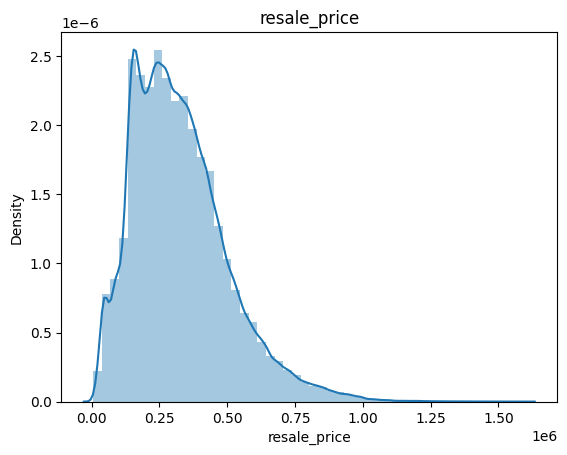

<ipython-input-29-7a0ded2aede5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


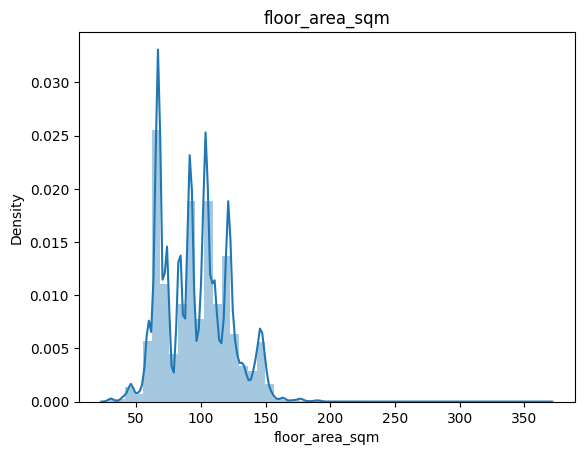

In [29]:
a=['resale_price','floor_area_sqm']
for i in a:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

<Axes: title={'center': 'floor area of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

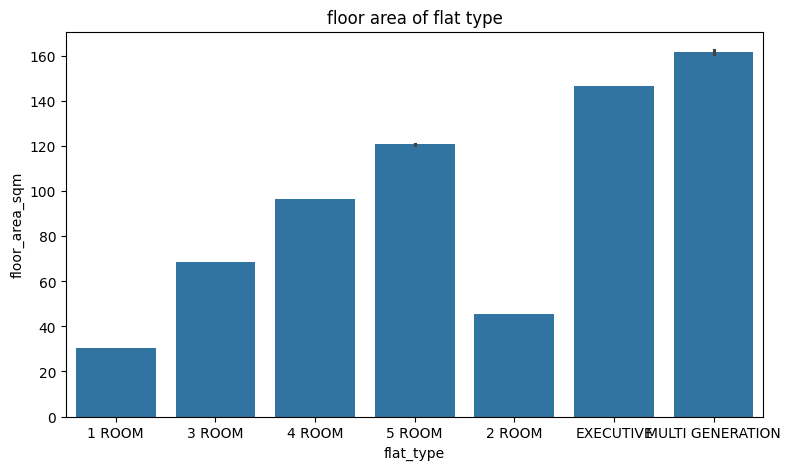

In [30]:
plt.figure(figsize = (9,5))
plt.title('floor area of flat type')
sns.barplot(x = 'flat_type', y ='floor_area_sqm', data = df,)

# Encode the data with label encoder

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
Label_encode = LabelEncoder()

# Apply label encoding to 'street_name' and convert to int32
df.loc[:, 'street_name'] = Label_encode.fit_transform(df['street_name']).astype('int32')


In [32]:
df.loc[:, 'flat_type'] = Label_encode.fit_transform(df['flat_type'])

In [33]:
df.loc[:, 'flat_model'] = Label_encode.fit_transform(df['flat_model'])

In [34]:
df.loc[:, 'town'] = Label_encode.fit_transform(df['town'])

In [35]:
df.loc[:, 'storey_range'] = Label_encode.fit_transform(df['storey_range'])

In [36]:
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month
0,0,0,309,14,5,31.0,7,1977,9000.0,1990,1
1,0,0,309,14,2,31.0,7,1977,6000.0,1990,1
2,0,0,309,14,5,31.0,7,1977,8000.0,1990,1
3,0,0,309,14,4,31.0,7,1977,6000.0,1990,1
4,0,2,216,14,2,73.0,20,1976,47200.0,1990,1
...,...,...,...,...,...,...,...,...,...,...,...
199322,26,5,344,558,0,145.0,15,1988,890000.0,2025,1
199323,26,5,352,568,2,146.0,15,1988,1008000.0,2025,1
199324,26,5,360,568,4,142.0,5,1988,880000.0,2025,1
199325,26,5,614,577,2,146.0,15,1987,800000.0,2025,1


<Axes: >

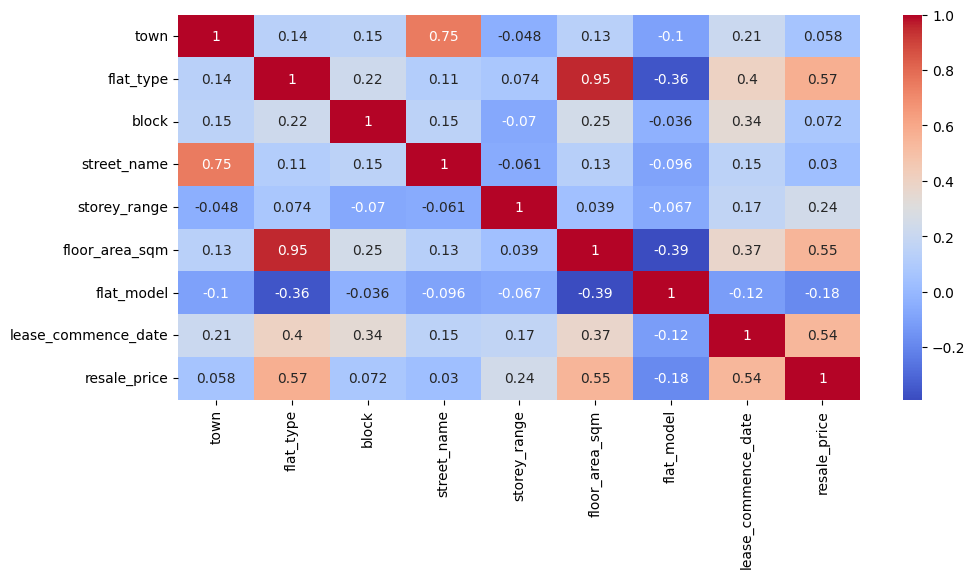

In [37]:
x=df[['town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','resale_price']].corr()
plt.figure(figsize = (11,5))
sns.heatmap(x, annot=True, cmap="coolwarm")

# split the data as Feature and target

In [38]:
x=df[['town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date','reg_year','reg_month']]
y=df[['resale_price']]

In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(x_train , y_train)
y_pred = linear_reg.predict(x_test)
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2 Score = {linear_reg.score(x_test,y_test)}')

MAE = 61945.10798609484
MSE = 6953009654.00455
R2 Score = 0.7761842466026198


In [41]:
from sklearn.tree import DecisionTreeRegressor

decision_reg = DecisionTreeRegressor()
decision_reg.fit(x_train , y_train)
y_pred = decision_reg.predict(x_test)
print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2 Score = {decision_reg.score(x_test,y_test)}')

MAE = 19712.684748282543
MSE = 906137953.6213207
R2 Score = 0.9708316313562272


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


# Initialize the RandomForestRegressor
random_forest_reg = RandomForestRegressor()

# Convert y_train and y_test from DataFrame to NumPy array, then ravel them
random_forest_reg.fit(x_train, y_train.values.ravel())  # Convert y_train to 1D array

# Make predictions on the test data
y_pred = random_forest_reg.predict(x_test)

# Print the evaluation metrics
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2 Score = {random_forest_reg.score(x_test, y_test)}')


MAE = 14675.747276211501
MSE = 483413842.99041593
R2 Score = 0.9844390215380604


In [43]:
with open ('sell.pkl', 'wb') as f:
    pickle.dump(decision_reg , f)

In [44]:
with open ('random_sell.pkl', 'wb') as f:
    pickle.dump(random_forest_reg , f)

In [ ]:
cat_column=['town', 'flat_type', 'block', 'street_name', 'flat_model']
unique_dist={}
for i in cat_column:
    unique_dist[f'{i}_initial']=df[i].unique().tolist()

    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    unique_dist[f'{i}_Final']=df[i].unique().tolist()
unique_dist

In [46]:
with open('Cat_Columns_Encoded_value.json', 'w') as file:
    json.dump(unique_dist, file , indent = 4)